In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import metrics
import pandas_datareader.data as web
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

## Data Preparation

#### Get Data

In [58]:
#Read stock data use pandas_datareader.data from web
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']
stk_data = web.DataReader(stk_tickers, 'yahoo')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')

In [59]:
stk_data 

Attributes   Adj Close                               Close              \
Symbols           MSFT         IBM       GOOGL        MSFT         IBM   
Date                                                                     
2017-10-06   71.413391  110.401917   49.681999   76.000000  140.038239   
2017-10-09   71.685867  111.087791   49.615501   76.290001  140.908218   
2017-10-10   71.685867  111.924393   49.389999   76.290001  141.969406   
2017-10-11   71.808037  111.261162   50.282501   76.419998  141.128113   
2017-10-12   72.465782  110.816460   50.282501   77.120003  140.564056   
...                ...         ...         ...         ...         ...   
2022-09-30  232.899994  118.809998   95.650002  232.899994  118.809998   
2022-10-03  240.740005  121.510002   98.639999  240.740005  121.510002   
2022-10-04  248.880005  125.500000  101.639999  248.880005  125.500000   
2022-10-05  249.199997  125.739998  101.430000  249.199997  125.739998   
2022-10-06  248.729996  122.809998  102.040001  248.729996  122.809998   

Attributes                    High                                 Low  \
Symbols          GOOGL        MSFT         IBM       GOOGL        MSFT   
Date                                                                     
2017-10-06   49.681999   76.029999  140.391968   49.713001   75.540001   
2017-10-09   49.615501   76.550003  141.290634   50.022999   75.860001   
2017-10-10   49.389999   76.629997  142.399612   49.873501   76.139999   
2017-10-11   50.282501   76.459999  141.940720   50.378502   75.949997   
2017-10-12   50.282501   77.290001  141.386230   50.577000   76.370003   
...                ...         ...         ...         ...         ...   
2022-09-30   95.650002  240.539993  122.430000   98.900002  232.729996   
2022-10-03   98.639999  241.610001  122.209999   99.290001  234.660004   
2022-10-04  101.639999  250.360001  125.650002  101.839996  244.979996   
2022-10-05  101.430000  250.580002  126.459999  101.930000  244.100006   
2022-10-06  102.040001  250.339996  125.250000  102.925400  246.089996   

Attributes                                Open                          \
Symbols            IBM       GOOGL        MSFT         IBM       GOOGL   
Date                                                                     
2017-10-06  139.885284   48.925499   75.669998  140.191208   49.000000   
2017-10-09  139.913956   49.575001   75.970001  140.057358   49.750000   
2017-10-10  141.156784   49.055500   76.330002  141.214142   49.764999   
2017-10-11  140.803055   49.396999   76.360001  141.873810   49.452000   
2017-10-12  140.315491   50.055000   76.489998  141.070740   50.192001   
...                ...         ...         ...         ...         ...   
2022-09-30  118.610001   95.559998  238.289993  121.660004   97.050003   
2022-10-03  119.599998   96.519997  235.410004  120.160004   96.760002   
2022-10-04  122.519997  100.379997  245.089996  122.800003  100.440002   
2022-10-05  124.230003   98.800003  245.990005  124.709999   99.830002   
2022-10-06  122.760002  100.589996  247.929993  124.879997  100.680000   

Attributes      Volume                         
Symbols           MSFT        IBM       GOOGL  
Date                                           
2017-10-06  13959800.0  2743867.0  31060000.0  
2017-10-09  11386500.0  2806000.0  25910000.0  
2017-10-10  13944500.0  4218100.0  23268000.0  
2017-10-11  15388900.0  3872501.0  36300000.0  
2017-10-12  16876500.0  3414458.0  30614000.0  
...                ...        ...         ...  
2022-09-30  35671100.0  5344800.0  32910100.0  
2022-10-03  28880400.0  4261700.0  27982000.0  
2022-10-04  34888400.0  4566100.0  28850800.0  
2022-10-05  20305500.0  3212200.0  22137500.0  
2022-10-06   8957591.0  1746600.0  11582532.0  

[1259 rows x 18 columns]

In [60]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2017-10-09,NaN,NaN
2017-10-10,112.15,1.3215
2017-10-11,112.35,1.3210
2017-10-12,112.38,1.3174
2017-10-13,111.94,1.3304
...,...,...
2022-09-26,144.45,1.0703
2022-09-27,144.71,1.0753
2022-09-28,144.15,1.0832


In [61]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2017-10-09,2544.73,22761.07,10.33
2017-10-10,2550.64,22830.68,10.08
2017-10-11,2555.24,22872.89,9.85
2017-10-12,2550.93,22841.01,9.91
2017-10-13,2553.17,22871.72,9.61
...,...,...,...
2022-09-29,3640.47,29225.61,31.84
2022-09-30,3585.62,28725.51,31.62
2022-10-03,3678.43,29490.89,30.10


In [62]:
##Select columns
Base = stk_data.loc[:, ('Adj Close', 'MSFT')]
# print(Base)
X1 = stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]
# print(X1)
X2 = ccy_data
# print(X2)
X3 = idx_data
# print(X3)

In [63]:
Base

Date
2017-10-06     71.413391
2017-10-09     71.685867
2017-10-10     71.685867
2017-10-11     71.808037
2017-10-12     72.465782
                 ...    
2022-09-30    232.899994
2022-10-03    240.740005
2022-10-04    248.880005
2022-10-05    249.199997
2022-10-06    248.729996
Name: (Adj Close, MSFT), Length: 1259, dtype: float64

In [64]:
X1

Attributes   Adj Close            
Symbols          GOOGL         IBM
Date                              
2017-10-06   49.681999  110.401917
2017-10-09   49.615501  111.087791
2017-10-10   49.389999  111.924393
2017-10-11   50.282501  111.261162
2017-10-12   50.282501  110.816460
...                ...         ...
2022-09-30   95.650002  118.809998
2022-10-03   98.639999  121.510002
2022-10-04  101.639999  125.500000
2022-10-05  101.430000  125.739998
2022-10-06  102.040001  122.809998

[1259 rows x 2 columns]

In [65]:
X2

,DEXJPUS,DEXUSUK
DATE,,
2017-10-09,NaN,NaN
2017-10-10,112.15,1.3215
2017-10-11,112.35,1.3210
2017-10-12,112.38,1.3174
2017-10-13,111.94,1.3304
...,...,...
2022-09-26,144.45,1.0703
2022-09-27,144.71,1.0753
2022-09-28,144.15,1.0832


In [66]:
X3

,SP500,DJIA,VIXCLS
DATE,,,
2017-10-09,2544.73,22761.07,10.33
2017-10-10,2550.64,22830.68,10.08
2017-10-11,2555.24,22872.89,9.85
2017-10-12,2550.93,22841.01,9.91
2017-10-13,2553.17,22871.72,9.61
...,...,...,...
2022-09-29,3640.47,29225.61,31.84
2022-09-30,3585.62,28725.51,31.62
2022-10-03,3678.43,29490.89,30.10


#### Standardized Data

In [67]:
#Standardized data (X1, X2, X3) with kept index (date)
scaler = preprocessing.StandardScaler()
X1 = pd.DataFrame(scaler.fit_transform(X1.values),index = X1.index,columns=X1.columns)
X2 = pd.DataFrame(scaler.fit_transform(X2.values),index = X2.index,columns=X2.columns)
X3 = pd.DataFrame(scaler.fit_transform(X3.values),index = X3.index,columns=X3.columns)

In [68]:
Y = pd.DataFrame()
return_period = 1
Y = Base.shift(-return_period)
X4_3DT = Base.diff(3*return_period).shift(-3*return_period)
X4_6DT = Base.diff(6*return_period).shift(-6*return_period)
X4_12DT = Base.diff(12*return_period).shift(-12*return_period)
X4 = pd.concat([X4_3DT, X4_6DT, X4_12DT], axis=1)
X4.columns = ['MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']
X4 = pd.DataFrame(scaler.fit_transform(X4.values), index = X4.index,columns=X4.columns)

In [69]:
X = pd.concat([X1, X2, X3, X4], axis=1)
dataset = pd.concat([Y, X], axis=1)

#### Data Preparation

In [70]:
dataset.dropna(inplace=True)
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-10-10,71.808037,-1.091118,-0.335929,0.004572,0.199625,-1.228587,-1.421087,-1.220836,0.122510,0.053087,0.064339
2017-10-11,72.465782,-1.062738,-0.397100,0.028951,0.191501,-1.221866,-1.410762,-1.247359,0.127413,0.073206,0.488001
2017-10-12,72.813461,-1.062738,-0.438115,0.032608,0.133005,-1.228164,-1.418560,-1.240440,0.003141,0.096880,0.434613
2017-10-13,72.963806,-1.059209,-0.433248,-0.021025,0.344241,-1.224891,-1.411048,-1.275035,-0.054090,0.055455,0.341615
2017-10-16,72.907417,-1.056856,-0.452014,-0.047842,0.313368,-1.218359,-1.390198,-1.240440,-0.031199,0.040068,0.327837
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-14,245.380005,0.677140,1.118148,3.756446,-2.483077,0.810245,0.610235,0.633460,-1.413649,-1.518974,-1.918858
2022-09-15,244.740005,0.610683,0.915239,3.834457,-2.632567,0.744990,0.567852,0.646145,-0.583585,-1.042834,-0.573568
2022-09-16,244.520004,0.607186,1.079410,3.769854,-2.718687,0.704049,0.533753,0.649605,-1.081277,-1.021421,0.231039
2022-09-19,242.449997,0.615771,1.121837,3.806422,-2.744685,0.742857,0.582005,0.587334,-0.689737,-1.124709,0.280525


In [71]:

Y = pd.DataFrame()
Y = dataset.iloc[:, 0:1]
X = dataset.drop(dataset.columns[0],axis = 1)
Y

,"(Adj Close, MSFT)"
2017-10-10,71.808037
2017-10-11,72.465782
2017-10-12,72.813461
2017-10-13,72.963806
2017-10-16,72.907417
...,...
2022-09-14,245.380005
2022-09-15,244.740005
2022-09-16,244.520004
2022-09-19,242.449997


In [72]:
X

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-10-10,-1.091118,-0.335929,0.004572,0.199625,-1.228587,-1.421087,-1.220836,0.122510,0.053087,0.064339
2017-10-11,-1.062738,-0.397100,0.028951,0.191501,-1.221866,-1.410762,-1.247359,0.127413,0.073206,0.488001
2017-10-12,-1.062738,-0.438115,0.032608,0.133005,-1.228164,-1.418560,-1.240440,0.003141,0.096880,0.434613
2017-10-13,-1.059209,-0.433248,-0.021025,0.344241,-1.224891,-1.411048,-1.275035,-0.054090,0.055455,0.341615
2017-10-16,-1.056856,-0.452014,-0.047842,0.313368,-1.218359,-1.390198,-1.240440,-0.031199,0.040068,0.327837
...,...,...,...,...,...,...,...,...,...,...
2022-09-14,0.677140,1.118148,3.756446,-2.483077,0.810245,0.610235,0.633460,-1.413649,-1.518974,-1.918858
2022-09-15,0.610683,0.915239,3.834457,-2.632567,0.744990,0.567852,0.646145,-0.583585,-1.042834,-0.573568
2022-09-16,0.607186,1.079410,3.769854,-2.718687,0.704049,0.533753,0.649605,-1.081277,-1.021421,0.231039
2022-09-19,0.615771,1.121837,3.806422,-2.744685,0.742857,0.582005,0.587334,-0.689737,-1.124709,0.280525


In [73]:
X.reset_index(inplace=True)
X.drop(columns=['index'], inplace=True)
Y.reset_index(inplace=True)
Y.drop(columns=['index'], inplace=True)

C:\Users\Nuchtu\AppData\Local\Temp\ipykernel_19524\3913646921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.drop(columns=['index'], inplace=True)


In [74]:
dataCorr = X.corr()

<AxesSubplot:>

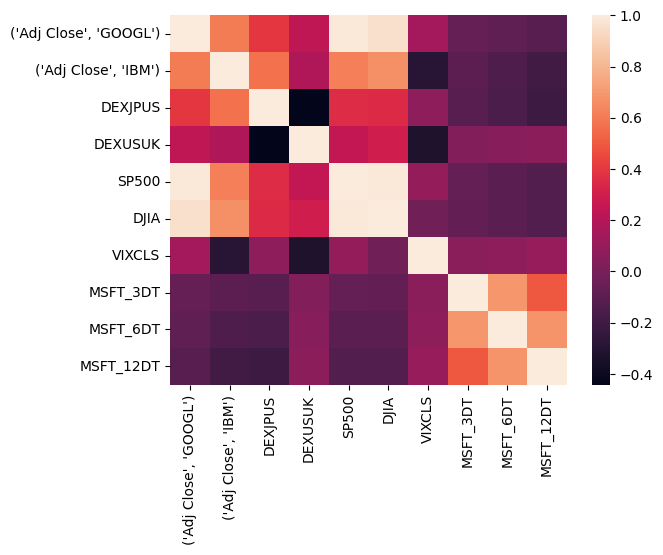

In [75]:
sns.heatmap(dataCorr)

In [76]:
lower = pd.DataFrame(np.tril(dataCorr, -1),columns = dataCorr.columns)
lower

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.603902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.391961,0.566410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.238152,0.182954,-0.442941,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.985318,0.612143,0.358342,0.247769,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.960365,0.664083,0.347267,0.297858,0.986154,0.000000,0.000000,0.000000,0.000000,0.0
6,0.143027,-0.285292,0.074915,-0.328463,0.096489,-0.023113,0.000000,0.000000,0.000000,0.0
7,-0.061492,-0.096278,-0.107671,0.031794,-0.069904,-0.071383,0.053540,0.000000,0.000000,0.0
8,-0.085672,-0.146277,-0.156425,0.048771,-0.099389,-0.101658,0.074502,0.688875,0.000000,0.0
9,-0.113684,-0.190025,-0.209097,0.068581,-0.133553,-0.134721,0.100974,0.493168,0.682728,0.0


In [77]:
to_drop = [column for column in lower if any(lower[column] > 0.9)]
X.drop(to_drop, inplace=True, axis=1)
X

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-0.335929,0.004572,0.199625,-1.421087,-1.220836,0.122510,0.053087,0.064339
1,-0.397100,0.028951,0.191501,-1.410762,-1.247359,0.127413,0.073206,0.488001
2,-0.438115,0.032608,0.133005,-1.418560,-1.240440,0.003141,0.096880,0.434613
3,-0.433248,-0.021025,0.344241,-1.411048,-1.275035,-0.054090,0.055455,0.341615
4,-0.452014,-0.047842,0.313368,-1.390198,-1.240440,-0.031199,0.040068,0.327837
...,...,...,...,...,...,...,...,...
1224,1.118148,3.756446,-2.483077,0.610235,0.633460,-1.413649,-1.518974,-1.918858
1225,0.915239,3.834457,-2.632567,0.567852,0.646145,-0.583585,-1.042834,-0.573568
1226,1.079410,3.769854,-2.718687,0.533753,0.649605,-1.081277,-1.021421,0.231039
1227,1.121837,3.806422,-2.744685,0.582005,0.587334,-0.689737,-1.124709,0.280525


In [78]:
Test_size = int(np.floor(0.3 * len( X )))
train_size = int(np.floor(0.7 * len( X )))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [79]:
X_train

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-0.335929,0.004572,0.199625,-1.421087,-1.220836,0.122510,0.053087,0.064339
1,-0.397100,0.028951,0.191501,-1.410762,-1.247359,0.127413,0.073206,0.488001
2,-0.438115,0.032608,0.133005,-1.418560,-1.240440,0.003141,0.096880,0.434613
3,-0.433248,-0.021025,0.344241,-1.411048,-1.275035,-0.054090,0.055455,0.341615
4,-0.452014,-0.047842,0.313368,-1.390198,-1.240440,-0.031199,0.040068,0.327837
...,...,...,...,...,...,...,...,...
855,0.054559,-0.402551,1.025072,0.924548,0.061488,-0.111521,0.753901,1.702314
856,0.255507,-0.363545,1.023447,0.973328,-0.098802,-0.157917,1.977912,2.218151
857,0.526992,-0.312350,1.140440,1.084233,-0.208353,-0.195720,1.312419,1.581049
858,0.484341,-0.290409,1.138815,1.108324,0.008443,1.148115,1.720416,2.047107


In [80]:
X_test

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
860,0.271091,-0.183143,1.142065,1.061893,-0.146082,2.003908,2.394618,1.930369
861,0.268629,-0.183143,1.190811,1.103882,-0.384788,1.223722,1.583590,1.291454
862,0.490081,-0.247746,1.324053,1.195361,-0.317904,0.644601,1.068610,0.893266
863,0.349829,-0.278220,1.229809,1.171646,-0.293688,1.299340,0.858390,0.694176
864,0.408061,-0.297723,1.080319,1.175564,-0.404392,0.959089,1.091002,0.869741
...,...,...,...,...,...,...,...,...
1224,1.118148,3.756446,-2.483077,0.610235,0.633460,-1.413649,-1.518974,-1.918858
1225,0.915239,3.834457,-2.632567,0.567852,0.646145,-0.583585,-1.042834,-0.573568
1226,1.079410,3.769854,-2.718687,0.533753,0.649605,-1.081277,-1.021421,0.231039
1227,1.121837,3.806422,-2.744685,0.582005,0.587334,-0.689737,-1.124709,0.280525


In [81]:
Y_train

,"(Adj Close, MSFT)"
0,71.808037
1,72.465782
2,72.813461
3,72.963806
4,72.907417
...,...
855,229.440231
856,233.528564
857,232.304047
858,228.956345


In [82]:
Y_test

,"(Adj Close, MSFT)"
860,239.325317
861,245.961472
862,244.766556
863,246.781067
864,250.089279
...,...
1224,245.380005
1225,244.740005
1226,244.520004
1227,242.449997


### Model Training and Cross Validation

In [83]:
#Set number of fold / Seed value
Num_fold = 3
Seed = 20

In [84]:
# Cross Validation Model
# set k-fold crossvalidation with shuffle
kfold = model_selection.KFold(n_splits=Num_fold, shuffle = True, random_state=Seed)
# kfold

In [85]:
# Model selection
Model_LM = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
# Model_LM
# c_val = 1
# c_val = 10
c_val = 100
svr_lin = SVR(kernel='linear', C=c_val)
svr_rbf = SVR(kernel='rbf', C=c_val, gamma=0.01)
svr_poly = SVR(kernel='poly', C=c_val, degree=2)
# svr_poly

In [86]:
# Calculate accuracy score for each model
score_LM = model_selection.cross_val_score(Model_LM, X_train, Y_train, cv=kfold)
score_lin = model_selection.cross_val_score(svr_lin, X_train, Y_train, cv=kfold)
score_rbf = model_selection.cross_val_score(svr_rbf, X_train, Y_train, cv=kfold)
score_poly = model_selection.cross_val_score(svr_poly, X_train, Y_train, cv=kfold)
score_LM


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(

array([0.8964533 , 0.89053001, 0.9011343 ])

In [87]:
# View score k-fold
# Valication score comparison
score = pd.DataFrame({'Linear Model':score_LM,'SVR_linear':score_lin, 'SVR_rbf': score_rbf, 'SVR_poly':score_poly})
score

,Linear Model,SVR_linear,SVR_rbf,SVR_poly
0,0.896453,0.889862,0.927205,0.865316
1,0.890530,0.879700,0.914259,0.804497
2,0.901134,0.887445,0.916536,0.868891


In [88]:
score_mean = pd.DataFrame({'AVG Linear Model':[score_LM.mean()],'AVG SVR_linear':[score_lin.mean()],'AVG SVR_rbf': [score_rbf.mean()], 'AVG SVC_poly': [score_poly.mean()]})
score_mean

,AVG Linear Model,AVG SVR_linear,AVG SVR_rbf,AVG SVC_poly
0,0.896039,0.885669,0.919333,0.846235


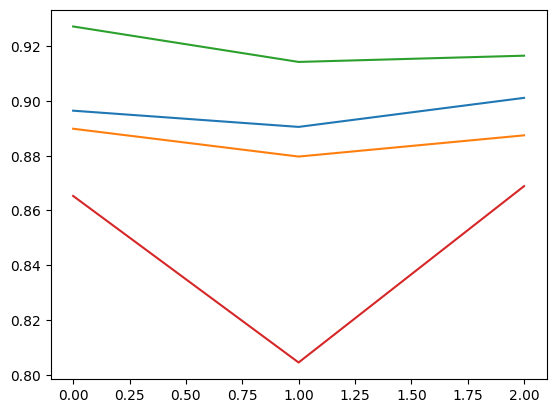

In [89]:
plt.plot(score)

### Model Evaluation

In [90]:
LM_pred = Model_LM.fit(X_train, Y_train).predict(X_test)
SVR_Linear = svr_lin.fit(X_train,Y_train).predict(X_test)
SVR_Rbf = svr_rbf.fit(X_train,Y_train).predict(X_test)
SVR_Poly = svr_poly.fit(X_train,Y_train).predict(X_test)
# SVR_Linear

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(

In [91]:
X_test

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
860,0.271091,-0.183143,1.142065,1.061893,-0.146082,2.003908,2.394618,1.930369
861,0.268629,-0.183143,1.190811,1.103882,-0.384788,1.223722,1.583590,1.291454
862,0.490081,-0.247746,1.324053,1.195361,-0.317904,0.644601,1.068610,0.893266
863,0.349829,-0.278220,1.229809,1.171646,-0.293688,1.299340,0.858390,0.694176
864,0.408061,-0.297723,1.080319,1.175564,-0.404392,0.959089,1.091002,0.869741
...,...,...,...,...,...,...,...,...
1224,1.118148,3.756446,-2.483077,0.610235,0.633460,-1.413649,-1.518974,-1.918858
1225,0.915239,3.834457,-2.632567,0.567852,0.646145,-0.583585,-1.042834,-0.573568
1226,1.079410,3.769854,-2.718687,0.533753,0.649605,-1.081277,-1.021421,0.231039
1227,1.121837,3.806422,-2.744685,0.582005,0.587334,-0.689737,-1.124709,0.280525


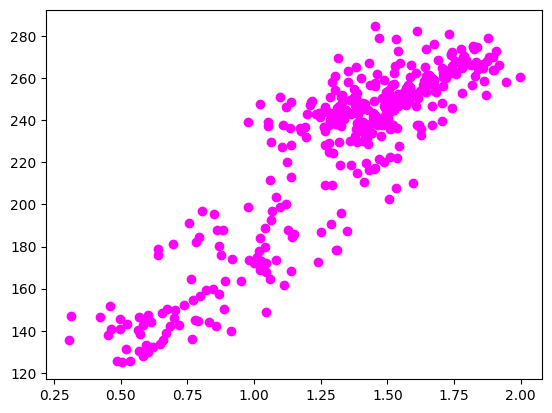

In [92]:
plt.scatter(X_test['DJIA'], LM_pred,c='magenta')

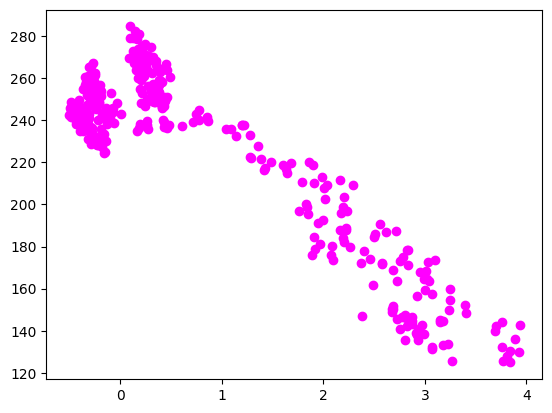

In [93]:
plt.scatter(X_test["DEXJPUS"], LM_pred,c='magenta')

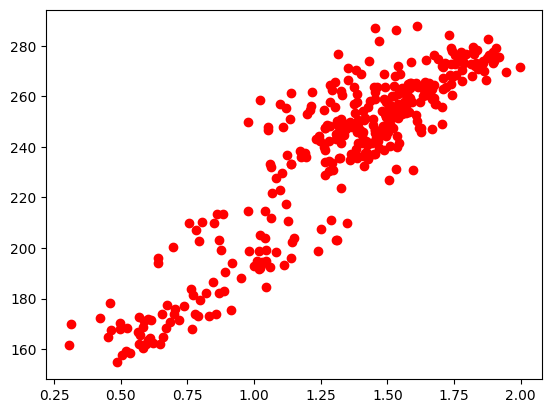

In [94]:
plt.scatter(X_test["DJIA"],SVR_Linear,c='red')

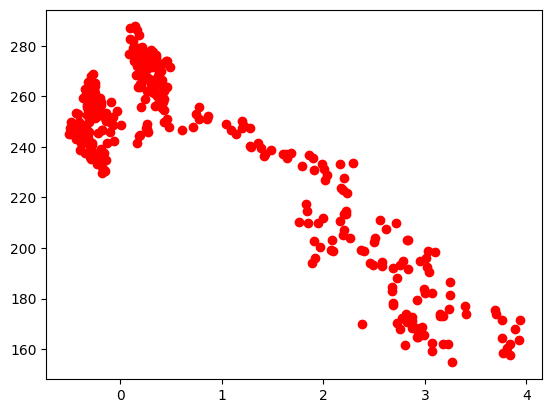

In [95]:
plt.scatter(X_test["DEXJPUS"],SVR_Linear,c='red')

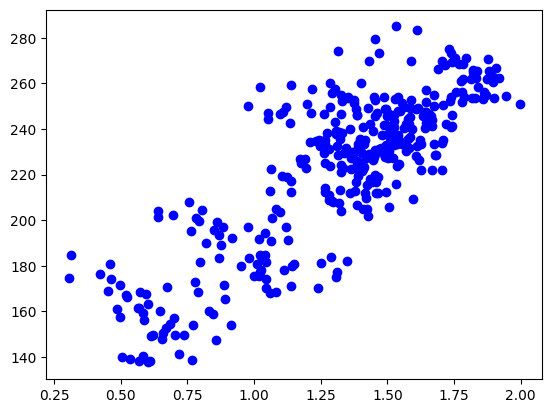

In [96]:
plt.scatter(X_test['DJIA'], SVR_Rbf,c='blue')

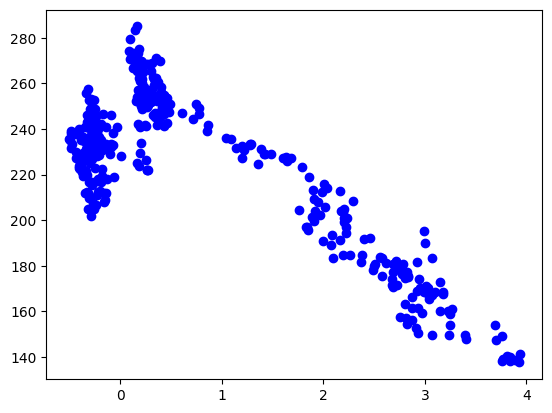

In [97]:
plt.scatter(X_test["DEXJPUS"], SVR_Rbf,c='blue')

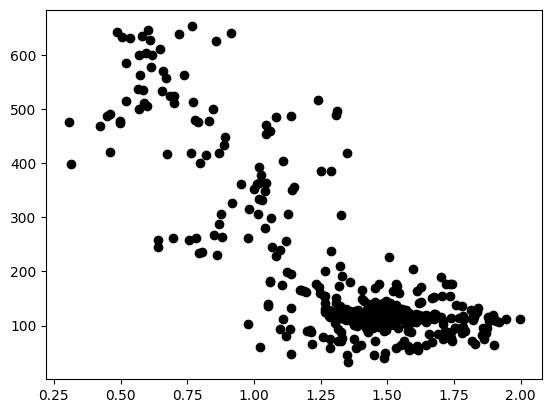

In [42]:
plt.scatter(X_test['DJIA'], SVR_Poly,c='black')

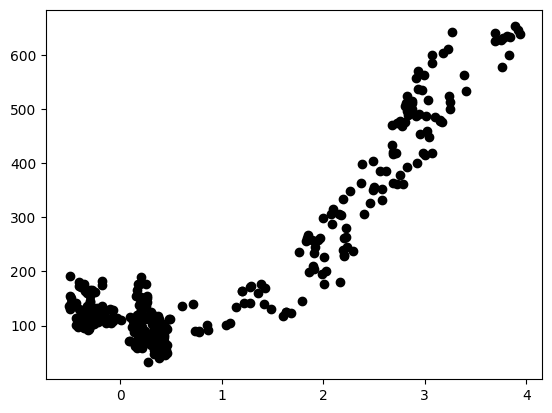

In [43]:
plt.scatter(X_test['DEXJPUS'], SVR_Poly,c='black')

In [44]:
# Model prediction performance evaluation for all model ( LM, SVR_linear, SVR_rbf, SVR Poly )
Lm_MSE = metrics.mean_squared_error(Y_test, LM_pred)
Lm_MSE

4503.895333989319

In [45]:
LM_r2 = metrics.r2_score(Y_test, LM_pred)
LM_r2

-5.398140742900523

In [46]:
SVR_linear_MSE = metrics.mean_squared_error(Y_test, SVR_Linear)
SVR_linear_MSE

2794.360302933313

In [47]:
SVR_linear_r2 = metrics.r2_score(Y_test, SVR_Linear)
SVR_linear_r2

-2.9696105656845795

In [48]:
SVR_Rbf_MSE = metrics.mean_squared_error(Y_test, SVR_Rbf)
SVR_Rbf_MSE

4338.647401519075

In [49]:
SVR_Rbf_r2 = metrics.r2_score(Y_test, SVR_Rbf)
SVR_Rbf_r2

-5.163392941050195

In [50]:
SVR_Poly_MSE = metrics.mean_squared_error(Y_test, SVR_Poly)
SVR_Poly_MSE

35792.20914370654

In [51]:
SVR_Poly_r2 = metrics.r2_score(Y_test, SVR_Poly)
SVR_Poly_r2

-49.845673493465895

In [52]:
mse = {Lm_MSE,SVR_linear_MSE,SVR_Rbf_MSE,SVR_Poly_MSE}
r2 = {LM_r2,SVR_linear_r2,SVR_Rbf_r2,SVR_Poly_r2}

In [53]:
mse

{2794.360302933313, 4338.647401519075, 4503.895333989319, 35792.20914370654}

In [54]:
r2

{-49.845673493465895,
 -5.398140742900523,
 -5.163392941050195,
 -2.9696105656845795}

<BarContainer object of 4 artists>

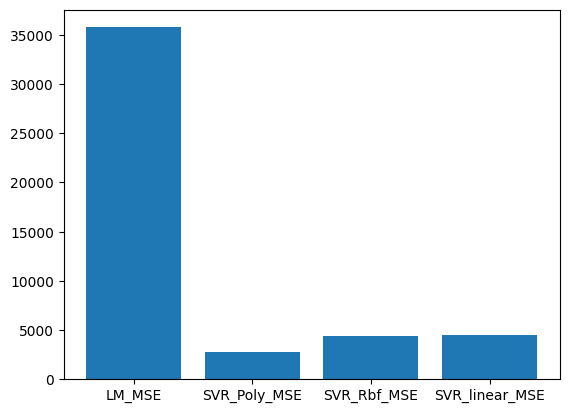

In [55]:
plt.bar(["LM_MSE","SVR_Poly_MSE","SVR_Rbf_MSE","SVR_linear_MSE"],mse)

<BarContainer object of 4 artists>

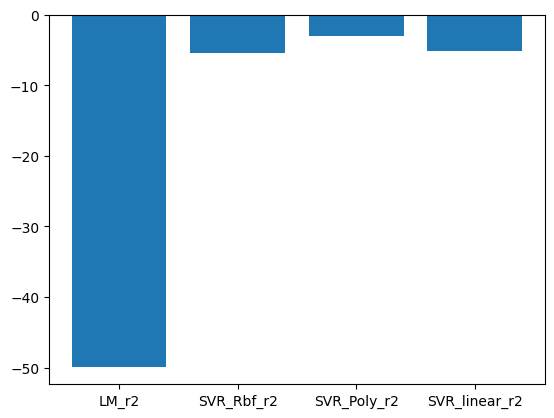

In [56]:
plt.bar(["LM_r2","SVR_Rbf_r2","SVR_Poly_r2","SVR_linear_r2"],r2)